# STACK OVERFLOW SOFTWARE DEVELOPER SURVEY

I have choosen to use only stack overflow data from year 2014 onwards. I will explain the reason below.

The question i keenly wanted to answer was which country provided the best living standard to its software developers. I felt that simply coverting salary from any currency to dollars and comparing them would be similiar to comparing apples to oranges. 

For instance, lets say an apple costs one dollar in USA. The Exchange rate is 1 dollar = 72 Indian rupees(approx.). However in India i don't need 72 rupees to buy an apple. If [IMF data](https://www.imf.org/external/datamapper/PPPEX@WEO/OEMDC/ADVEC/WEOWORLD) is to be believed i just need 18.07 rupees to buy that apple. That is whatever 1 dollar will buy in USA, 18.07 rupees will buy the same in India eventhough the exchange rate is 72 rupees. So 1 dollar will have 4 times as much reach in india as it has in USA. In other words, i can buy or avail 4 times more goods and services in India with 1 dollar when compared to USA.

So, i needed to calculate this factor that will allow me to bring salary in every other country to an even keel with the almighty american dollar. For that i collected Implied PPP conversion rate from IMF website and found every currency exchange rate with respect to the dollar. 

                    factor = currency exchange rate with respect to the dollar/Implied PPP conversion rate
                    
In order to calcuate the factor for every country i needed data country wise. Before 2014, the stack overflow data bunches up many countries together. For instance whole of Africa has been bunched together in 2013. So i ignored data for 2011,2012 and 2013. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os
import re
%matplotlib inline

In the cell below, just i am just assigning a path and setting that path as working directory.

In [2]:
dir = "./data/"
os.chdir(dir)
csv_files = glob.glob("*.csv")

In [3]:
def get_outlier_index(df_data, group_by_lst, column_name, zscore_ = 2):
    '''This funtion takes in a dataframe and indentifies outliers in the
    column name supplied, then returns a list of indexes of outliers.

    :param df_data: A dataframe for which the outlier has to be identified
    and corresponding indexes returned.
    :param group_by_lst: list of column names to groupby the dataframe before
    outlier is identified.
    :param column_name: column name for which outlier index is necessary
    :param zscore_: zscore_ to determine outliers. For instance zscore_ keeps
    47.75% of data on either side of the mean.
    :return: A list of indexes of a dataframe. This index will represent the
    outliers in column name sent into this function using "column_name" parameter.
    '''
    lst_empty = []
    grouped = df_data.groupby(group_by_lst)
    for name, group in grouped:
        if group.shape[0] > 1:
            z = np.abs(stats.zscore(group[column_name]))
            if (z > zscore_).any():
                for val in list(group[(z > zscore_)].index):
                        lst_empty.append(val)
    return lst_empty

In [4]:
def change_country_names(df, column_name, old_country_name, new_country_name):
    '''This function changes the name of a country from old_country_name to new_country_name.

    :param df: Dataframe where a column in which country name should be changed is present.
    :param column_name: Column name where country name is to be changed
    :param old_country_name: Old name of the country.
    :param new_country_name: New name of the country
    :return: returns a dataframe with the new country names.
    '''
    df.loc[df[column_name] == old_country_name, column_name] = new_country_name
    return df

In [5]:
def clean_country_names(column_name, df):
    '''Some countries have multiple names. This function takes in a dataframe
    and a column name where country names are present, and then converts
    multiple names for a same country to one name.

    :param column_name: name of the column on which country names are present.
    :param df: dataframe with unstandaridized country names.
    :return: A dataframe with standaridized country names.
    '''
    df = df.loc[np.logical_not(
        np.logical_or(df[column_name] == "Other Country (Not Listed Above)", \
                      df[column_name] == "I prefer not to say")), :]

    df = df.loc[np.logical_not(np.logical_or(df[column_name] == "Other", df[
        column_name] == "Other (please specify)")), :]
    df = change_country_names(df, column_name, "Antigua & Deps","Antigua and Barbuda")
    df = change_country_names(df, column_name, "Azerbaidjan","Azerbaijan")
    df = change_country_names(df, column_name, "Bosnia-Herzegovina", "Bosnia and Herzegovina")
    df = change_country_names(df, column_name, "Bosnia Herzegovina", "Bosnia and Herzegovina")
    df = change_country_names(df, column_name, "Brunei", "Brunei Darussalam")
    df = change_country_names(df, column_name, "Burkina", "Burkina Faso")
    df = change_country_names(df, column_name, "Central African Rep", "Central African Republic")
    df = change_country_names(df, column_name, "Congo {Democratic Rep}", "Democratic Republic of the Congo")
    df = change_country_names(df, column_name, "Hong Kong", "Hong Kong (S.A.R.)")
    df = change_country_names(df, column_name, "Iran", "Iran, Islamic Republic of...")
    df = change_country_names(df, column_name, "Ireland {Republic}", "Ireland")
    df = change_country_names(df, column_name, "CÃ´te d'Ivoire", "Ivory Coast")
    df = change_country_names(df, column_name, "Ivory Coast (Cote D'Ivoire)", "Ivory Coast")
    df = change_country_names(df, column_name, "Côte d\'Ivoire", "Ivory Coast")
    df = change_country_names(df, column_name, "Libya", "Libyan Arab Jamahiriya")
    df = change_country_names(df, column_name, "Macedonia", "The former Yugoslav Republic of Macedonia")
    df = change_country_names(df, column_name, "Macedonia [FYROM]", "The former Yugoslav Republic of Macedonia")
    df = change_country_names(df, column_name, "Micronesia", "Micronesia, Federated States of...")
    df = change_country_names(df, column_name, "Myanmar [Burma]", "Myanmar")
    df = change_country_names(df, column_name, "Myanmar, {Burma}", "Myanmar")
    df = change_country_names(df, column_name, "Korea North", "Democratic People's Republic of Korea")
    df = change_country_names(df, column_name, "North Korea", "Democratic People's Republic of Korea")
    df = change_country_names(df, column_name, "Russia", "Russian Federation")
    df = change_country_names(df, column_name, "Slovak Republic", "Slovakia")
    df = change_country_names(df, column_name, "Korea South", "Republic of Korea")
    df = change_country_names(df, column_name, "South Korea", "Republic of Korea")
    df = change_country_names(df, column_name, "Syria", "Syrian Arab Republic")
    df = change_country_names(df, column_name, "Tadjikistan", "Tajikistan")
    df = change_country_names(df, column_name, "Trinidad & Tobago", "Trinidad and Tobago")
    df = change_country_names(df, column_name, "Venezuela", "Venezuela, Bolivarian Republic of...")
    df = change_country_names(df, column_name, "Viet Nam", "Vietnam")
    df = change_country_names(df, column_name, "Moldavia", "Moldova")
    return df

In [6]:
def impute_median_values(df,group_by_lst,column_name):
    '''This function takes a dataframe and a column name, then imputes the
    median value of the supplied column name in place of NA values.

    :param df: A dataframe fin which median values needs to be imputed
    :param group_by_lst: list of column names to groupby the dataframe
    before median values are imputed.
    :param column_name: Name of column in the dataframe for which median
    needs to be imputed.
    :return: A dataframe with the median values of the supplied column name
    imputed in place of NA.
    '''
    df_empty = pd.DataFrame()
    grouped = df.groupby(group_by_lst)
    for name,group in grouped:
        # Experts recommend that atleast 30 data points should be there to calculate std. dev and thereby outliers. I have
        # taken double the required amount to make sure that small countries with few outliers should not have
        # an undue influence on the end result.
        if group.shape[0] > 60:
            # group["Salary_in_dollars"] = group["Salary_in_dollars"].apply(lambda col: col.fillna(col.median()))
            # group["Salary_in_dollars"] = group["Salary_in_dollars"].fillna(1000)
            
            group.loc[group[column_name].isna(),column_name] = \
                                                    group[column_name].median()
            
            group.loc[group[column_name].isna(),column_name] = 1000
            df_empty = pd.concat([df_empty,group],axis = 0,sort = True)
    return df_empty

In [7]:
def get_ppp_adjusted_salary(df, ppp_series, group_by_lst, column_name,new_column_name):
    '''This function takes a dataframe and a column name for which ppp(
    purchasing power parity) adjusted salary is required.

    :param df: Dataframe with column in which ppp adjusted salary is required
    :param ppp_series: A series with ratios on ppp calculation
    :param group_by_lst: list of column name to groupby the dataframe
    before ppp calculations are applied.
    :param column_name: Column name on which ppp calculations are applied.
    :param new_column_name: Column name which should have ppp adjusted salary
    :return: Returns a data frame with a new column where ppp adjusted
    salary is present.
    '''
    df_empty = pd.DataFrame()
    grouped = df.groupby(group_by_lst)
    for name, group in grouped:
        ppp_mul_factor = ppp_series[name]
        
        #group["Salary_ppp_adjusted"] = group["Salary_in_dollars"] * ppp_mul_factor
        
        group.loc[:,new_column_name] = group[column_name] * ppp_mul_factor
        df_empty = pd.concat([df_empty,group], axis = 0,sort = True)
    return df_empty

In [8]:
def annotate_line(s, xy, xytext):
    '''This function takes in a text and two other coordinates as explained below and returns the annotated object.
    :param s: The text of the annotation.
    :param xy: Length 2 sequence specifying the (x,y) point to annotate.
    :param xytext: Length 2 sequence specifying the (x,y) to place the text at.
    :return: annotated object
    '''
    return ax.annotate(s=s, xy=xy, xytext=xytext)

The code below reads in stack overflow data from 2014 through 2018. Since each year stack overflow data has the same information under different column headings, i read them in and then change the column names, make necessary string manipulation to bring data from all years to the same format and then fill in dummy data in columns where required data in not available across all five years.

In [9]:
df_all_survey_data = pd.DataFrame()
for filename in csv_files:
    year = re.sub(r"(.*)?\.csv",r"\1",filename)
    if int(year)==2014:
        df = pd.read_csv(filename, skiprows=[1], low_memory=False, usecols=["What Country do you live in?",\
                                            "Including bonus, what is your annual compensation in USD?"])
        
        df = df.rename(index = str,columns = {"What Country do you live in?":"Country",\
                                            "Including bonus, what is your annual compensation in USD?":"Salary_in_dollars"})
        
        df["Salary_in_dollars"] = df["Salary_in_dollars"].str.replace(r"[^\d\-]", "")
        df["Salary_in_dollars"] = df["Salary_in_dollars"].str.replace(r"-.*", "-")
        df['Salary_in_dollars'].replace('', np.nan, inplace=True)
        
        df["Salary_in_dollars"] = df["Salary_in_dollars"].map({"20000": 10000, "20000-": 30000, "40000-": 50000, \
                                    "60000-": 70000, "80000-": 90000, "100000-": 110000,"120000-": 130000, "140000": 140000})
        
        df = df.assign(**{"Hobby": "No data", "Hobby_hours": "No data", "Developer_type": "No data",\
                                              "JobSearchStatus":"No data","Year":int(year)})

    elif int(year)==2015:
        df = pd.read_csv(filename,skiprows=[0],low_memory=False, usecols=["Country","Compensation: midpoint",\
                                "How many hours programming as hobby per week?","Open to new job opportunities","Occupation"])
        
        df = df.rename(index=str, columns={"Compensation: midpoint": "Salary_in_dollars", \
                                "How many hours programming as hobby per week?": "Hobby_hours","Open to new job opportunities"\
                                :"JobSearchStatus","Occupation":"Developer_type"})
        
        df["Salary_in_dollars"] = df["Salary_in_dollars"].str.replace(r"[^\d\-]", "")
        df['Salary_in_dollars'].replace('', np.nan, inplace=True)
        
        df["JobSearchStatus"] = df["JobSearchStatus"].map({"I am actively looking for a new job":\
                                  "Actively looking for a new job","I am open to new job opportunities":\
                                  "Not actively looking but open to new job opportunities",\
                                  "I am not interested in other job opportunities":"Not interested in new job opportunities"})
        
        df["Hobby"] = df["Hobby_hours"].map({"No data":"No","None":"No","1-2 hours per week":"Yes",\
                                  "2-5 hours per week":"Yes","10-20 hours per week":"Yes","5-10 hours per week":"Yes",\
                                  "20+ hours per week":"Yes"})
        
        df["Year"] = int(year)

    elif int(year)==2016:
        df = pd.read_csv(filename,low_memory=False, usecols=["country","salary_midpoint","hobby","open_to_new_job","occupation"])
        df = df.rename(index=str, columns={"country": "Country","salary_midpoint": "Salary_in_dollars","hobby": \
                                           "Hobby_hours","open_to_new_job":"JobSearchStatus","occupation":"Developer_type"})
                                           
        df["JobSearchStatus"] = df["JobSearchStatus"].map({"I am actively looking for a new job":\
                        "Actively looking for a new job","I'm not actively looking, but I am open to new opportunities":\
                        "Not actively looking but open to new job opportunities","I am not interested in new job opportunities":\
                        "Not interested in new job opportunities"})
        
        df["Hobby"] = df["Hobby_hours"].map({"No data": "No", "None": "No","Other (please specify)":"No","1-2 hours per week": \
                                             "Yes","2-5 hours per week": "Yes","5-10 hours per week": "Yes",\
                                             "10-20 hours per week": "Yes", "20+ hours per week":"Yes"})
        df["Year"] = int(year)

    elif int(year)==2017:
        df = pd.read_csv(filename,low_memory=False, usecols=["Country","Salary","ProgramHobby","JobSeekingStatus","DeveloperType"])
        
        df = df.rename(index=str, columns={"Salary": "Salary_in_dollars",  "ProgramHobby": "Hobby",\
                                           "JobSeekingStatus":"JobSearchStatus","DeveloperType":"Developer_type"})
        
        df["JobSearchStatus"] = df["JobSearchStatus"].map({"I am actively looking for a job":\
                                            "Actively looking for a new job",\
                                            "I'm not actively looking, but I am open to new opportunities":\
                                            "Not actively looking but open to new job opportunities",\
                                            "I am not interested in new job opportunities":\
                                            "Not interested in new job opportunities"})
        
        df["Hobby"] = df["Hobby"].map({"Yes, both":"Yes","Yes, I program as a hobby":"Yes",\
                                            "Yes, I contribute to open source projects":"Yes","No":"No"})
        df = df.assign(**{"Hobby_hours": "No data","Year": int(year)})

    else:
        df = pd.read_csv(filename,low_memory=False, usecols=["Country","ConvertedSalary","Hobby","JobSearchStatus","DevType"])
        df = df.rename(index=str, columns={"ConvertedSalary": "Salary_in_dollars","DevType":"Developer_type"})
        
        df["JobSearchStatus"] = df["JobSearchStatus"].str.replace(r".*?not actively looking, but I am open.*", \
                                                                  "Not actively looking but open to new job opportunities")
        
        df["JobSearchStatus"] = df["JobSearchStatus"].map({"I am actively looking for a job": \
                                "Actively looking for a new job","I am not interested in new job opportunities": \
                                "Not interested in new job opportunities",\
                                "Not actively looking but open to new job opportunities":\
                                "Not actively looking but open to new job opportunities"})
        
        df = df.assign(**{"Hobby_hours": "No data","Year": int(year)})

    df_all_survey_data = pd.concat([df_all_survey_data,df], axis = 0, sort = True)
df_all_survey_data["Salary_in_dollars"] = df_all_survey_data["Salary_in_dollars"].astype(float)
df_all_survey_data.reset_index(drop=True, inplace=True)

In [10]:
# "clean_country_names" function cleans up the countries that have multiple names and bring it to one common name.
df_all_survey_data = clean_country_names("Country", df_all_survey_data)

df_all_survey_data_no_na = df_all_survey_data.loc[np.logical_not(df_all_survey_data["Salary_in_dollars"].isna()),:]

Removing the outliers even before imputing missing values because i didn't want outliers to have any undue influence on imputed values. Particularly year 2014 had some values that are too big to be probable. 

In [11]:
outlier_index_lst = get_outlier_index(df_all_survey_data_no_na,["Country","Year"], "Salary_in_dollars",2)

df_all_survey_data = df_all_survey_data.drop(outlier_index_lst,axis = 0)

C:\Anaconda_Udacity\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Anaconda_Udacity\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in greater


Chose to impute missing values as simply droping them would mean loss of valuable information from other columns. Moreover, i chose to impute the median value and not the mean value because even after removing outliers the data seemed to have some suspicous looking values. In order to negate their influece i chose to impute median as mean is more susceptible to outliers.

In [12]:
# Suppressing the dataframe slicling warning
pd.options.mode.chained_assignment = None  # default='warn'

# Imputing median values(Reason explained above in the markdown cell)
df_all_survey_data = impute_median_values(df_all_survey_data,["Country","Year"], "Salary_in_dollars")


In [13]:
# Reading in the custom made file that has the ppp factor which has to be multiplied with the salaries.
df_implied_ppp = pd.read_csv(dir+"ppp_data/implied_ppp.csv")
ppp_lookup_series = pd.Series(data = np.array(df_implied_ppp["ratio"]), index = np.array(df_implied_ppp["country"]))

# Multiplying the ppp factor to each of the salaries.
df_all_survey_data = get_ppp_adjusted_salary(df_all_survey_data, ppp_lookup_series, ["Country"], \
                                             "Salary_in_dollars","Salary_ppp_adjusted")

In [14]:
# Trying to find out which country provides best living standard for its software developers.
df_average_salary_ppp_adjusted = pd.DataFrame(df_all_survey_data.groupby("Country").mean()\
                                              [["Salary_in_dollars","Salary_ppp_adjusted"]])

df_average_salary_ppp_adjusted.sort_values("Salary_ppp_adjusted",inplace=True,ascending=False)

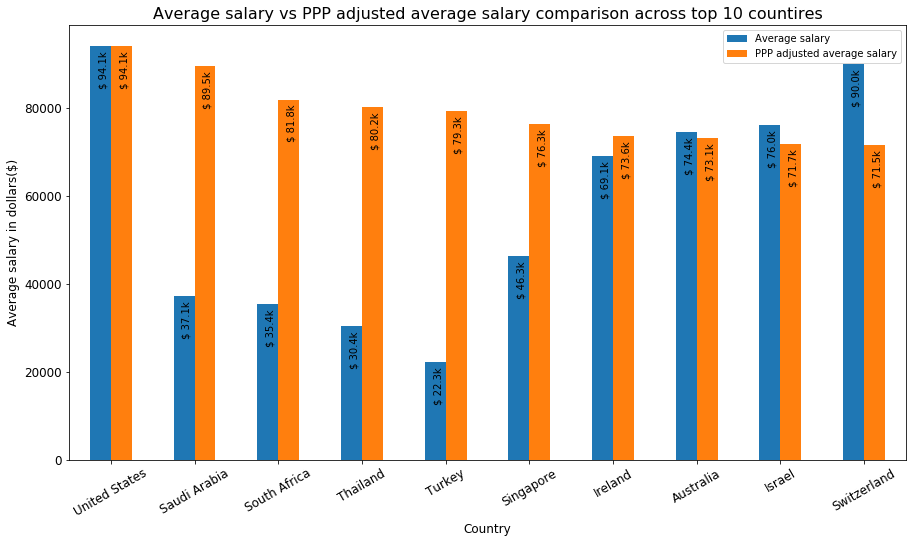

In [15]:
ax = df_average_salary_ppp_adjusted.iloc[:10,:][["Salary_in_dollars","Salary_ppp_adjusted"]].plot(kind='bar',\
                                                                        legend = True, figsize=(15, 8),fontsize=12)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Average salary in dollars($)", fontsize=12)
plt.xticks(rotation = 30)
plt.title("Average salary vs PPP adjusted average salary comparison across top 10 countires",fontsize=16)
L = plt.legend()
L.get_texts()[0].set_text('Average salary')
L.get_texts()[1].set_text('PPP adjusted average salary')
for patch in ax.patches:
    
     ax.text(patch.get_x()+0.1,  patch.get_height()-3000, "$ "+ str(round(patch.get_height()/1000, 1)) + "k", \
             rotation=90,fontsize=10)
        
plt.show()

In [16]:
# Since all the required data is not available for all the years, i am creating year specific indexes to access the data easily.
idx1 = np.logical_or(df_all_survey_data["Year"] == 2015,df_all_survey_data["Year"] == 2016)
idx2 = np.logical_or(df_all_survey_data["Year"] == 2017,df_all_survey_data["Year"] == 2018)
df_year_2015_2018 = df_all_survey_data.loc[np.logical_or(idx1, idx2),:]

In [17]:
# Trying to find out if hobby has a strong correlation towards the salary.
# Not imputing the "Hobby" column for missing values as imputing it with mode might have unexpected influence over the results. 
# Moreover, we already have sufficient data to answer this question quite convincingly.

df_hobby = df_year_2015_2018.groupby(["Year","Hobby"]).mean()["Salary_ppp_adjusted"].unstack(level = 1)
df_hobby.loc["Total"] = df_hobby.sum()

df_hobby["percentage_difference"] = ((df_hobby["Yes"] - df_hobby["No"])/df_hobby["No"])*100
df_hobby = df_hobby.rename(index = str, columns = {"Yes":"Developers who code as a hobby","No":\
                                                   "Developers who don't code as a hobby"})

print(round(df_hobby.iloc[:,:-1],0))

Hobby  Developers who don't code as a hobby  Developers who code as a hobby
Year                                                                       
2015                                66832.0                         63174.0
2016                                62186.0                         58518.0
2017                                55482.0                         56330.0
2018                                67840.0                         68430.0
Total                              252340.0                        246451.0


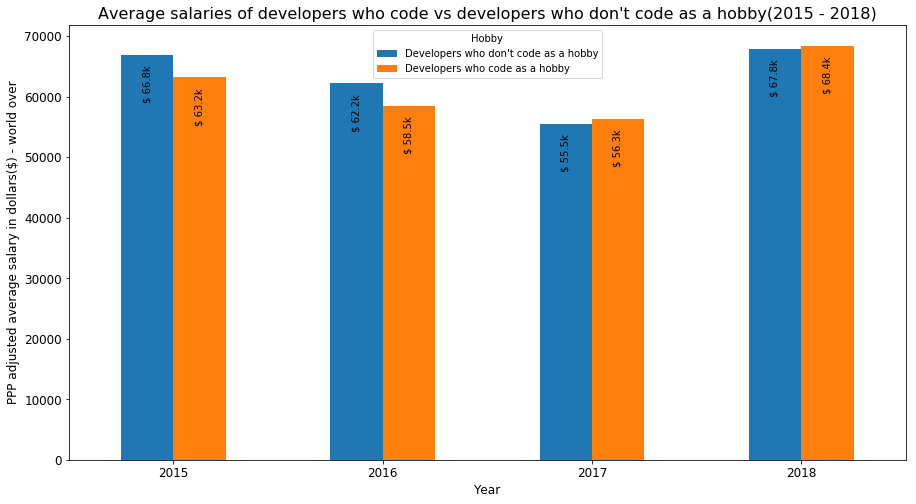

In [18]:
ax = df_hobby.iloc[0:4,:-1].plot(kind='bar',legend = True, figsize=(15, 8),fontsize=12)
ax.set_ylabel("PPP adjusted average salary in dollars($) - world over", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
plt.xticks(rotation = 0)
plt.title("Average salaries of developers who code vs developers who don't code as a hobby(2015 - 2018)", fontsize = 16)

for patch in ax.patches:
    
     ax.text(patch.get_x()+0.1,  patch.get_height()-3000, "$ "+ str(round(patch.get_height()/1000, 1)) + "k", \
                                                                                 rotation=90,fontsize=10)

In [19]:
df_year_2015_2016 = df_all_survey_data.loc[idx1,:]
# Not imputing the "Hobby_hours" column for missing values as imputing it with mode might have unexpected influence over the results. 
# Moreover, we already have sufficient data to answer this question quite convincingly.

df_hobby_hours = df_year_2015_2016.groupby(["Year","Hobby_hours"]).mean()["Salary_ppp_adjusted"].unstack(level = 1)
print(round(df_hobby_hours,0))

Hobby_hours  1-2 hours per week  10-20 hours per week  2-5 hours per week  \
Year                                                                        
2015                    63997.0               64138.0             63265.0   
2016                    61230.0               54464.0             59859.0   

Hobby_hours  20+ hours per week  5-10 hours per week     None  \
Year                                                            
2015                    58582.0              63681.0  66832.0   
2016                    47086.0              59181.0  62980.0   

Hobby_hours  Other (please specify)  
Year                                 
2015                            NaN  
2016                        53981.0  


Text(0.6,0.95,"Developers who don't code as a hobby")

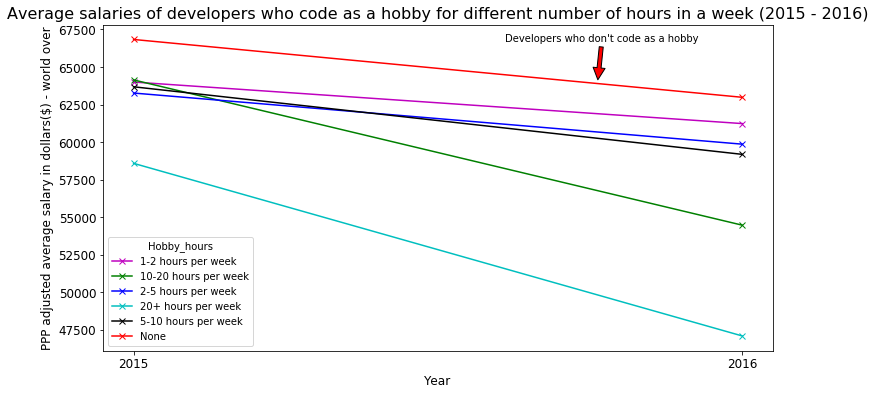

In [20]:
ax = df_hobby_hours.iloc[:,:-1].plot(legend = True, figsize=(12, 6),fontsize=12, color = ["m","g","b","c","k","r"], marker = "x")
ax.set_ylabel("PPP adjusted average salary in dollars($) - world over", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
x_ticks = [2015,2016]
ax.set_xticks(x_ticks)
plt.xticks(rotation = 0)

plt.title("Average salaries of developers who code as a hobby for different number of hours in a week (2015 - 2016)", \
                                                                                                      fontsize = 16)
ax.annotate(s = "Developers who don't code as a hobby",xy = (0.7385,0.825),xytext = (0.6,0.95), \
                                                xycoords = 'axes fraction',arrowprops = dict(facecolor = "r", shrink = 0.05))

In [21]:
# Trying to find out what makes people to actively look for a new job. Does this dissatisfaction have anything to do with Salary.
# Not imputing the "JobSearchStatus" column for missing values as imputing it with mode might have unexpected influence over the results. 
# Moreover, we already have sufficient data to answer this question quite convincingly.

df_job_search_status = df_year_2015_2018.groupby(["Year","JobSearchStatus"]).count()["Country"].unstack(level = 1)
df_job_search_status.loc["Total"] = df_job_search_status.sum()
df_job_search_status["Year_total"] = df_job_search_status.sum(axis = 1)

In [22]:
df_job_search_status["perc_actively_looking"] = \
            (df_job_search_status["Actively looking for a new job"]/df_job_search_status["Year_total"])*100

df_job_search_status["perc_open_to_new_opportunities"] = \
            (df_job_search_status["Not actively looking but open to new job opportunities"]/df_job_search_status["Year_total"])*100

df_job_search_status["perc_satisfied_with_job"] = \
            (df_job_search_status["Not interested in new job opportunities"]/df_job_search_status["Year_total"])*100

print(round(df_job_search_status.iloc[0:4,4:],0))

JobSearchStatus  perc_actively_looking  perc_open_to_new_opportunities  \
Year                                                                     
2015                              10.0                            59.0   
2016                              15.0                            63.0   
2017                              13.0                            62.0   
2018                              16.0                            60.0   

JobSearchStatus  perc_satisfied_with_job  
Year                                      
2015                                31.0  
2016                                22.0  
2017                                25.0  
2018                                24.0  


Text(0.5,1,'Percentage of developers with different job search status (2015 - 2018)')

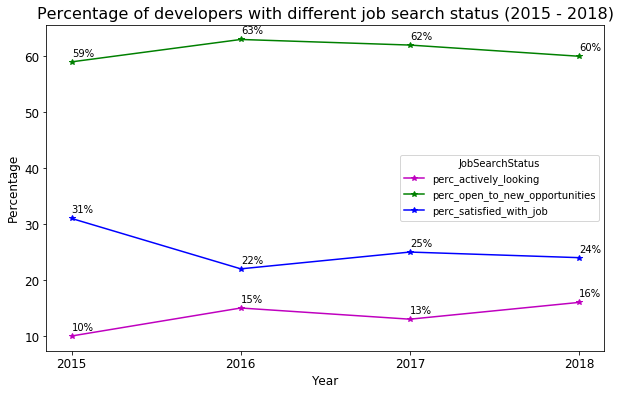

In [23]:
ax = round(df_job_search_status.iloc[0:4,4:],0).plot(kind = "line",legend = True, figsize=(10, 6),fontsize=12, \
                                                           color = ["m","g","b","c"], marker = "*")
ax.set_xlabel("Year", fontsize=12)
x_ticks = [2015,2016,2017,2018]
ax.set_xticks(x_ticks)
plt.xticks(rotation = 0)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
annotate_line("31%",(2015,31),(2015,32))
annotate_line("10%",(2015,10),(2015,11))
annotate_line("59%",(2015,59),(2015,60))
annotate_line("22%",(2016,22),(2016,23))
annotate_line("15%",(2016,15),(2016,16))
annotate_line("63%",(2016,63),(2016,64))
annotate_line("25%",(2017,25),(2017,26))
annotate_line("13%",(2017,23),(2017,14))
annotate_line("62%",(2017,62),(2017,63))
annotate_line("24%",(2018,24),(2018,25))
annotate_line("16%",(2018,16),(2018,17))
annotate_line("60%",(2018,60),(2018,61))
plt.title("Percentage of developers with different job search status (2015 - 2018)", fontsize = 16)

In [24]:
df_job_search_status = df_year_2015_2018.groupby(["Year","JobSearchStatus"]).mean()["Salary_ppp_adjusted"].unstack(level = 1)
df_job_search_status.loc["Total"] = df_job_search_status.sum()
print(round(df_job_search_status,0))

JobSearchStatus  Actively looking for a new job  \
Year                                              
2015                                    57785.0   
2016                                    50955.0   
2017                                    52799.0   
2018                                    61559.0   
Total                                  223098.0   

JobSearchStatus  Not actively looking but open to new job opportunities  \
Year                                                                      
2015                                                       61197.0        
2016                                                       59370.0        
2017                                                       56077.0        
2018                                                       70431.0        
Total                                                     247076.0        

JobSearchStatus  Not interested in new job opportunities  
Year                                                     

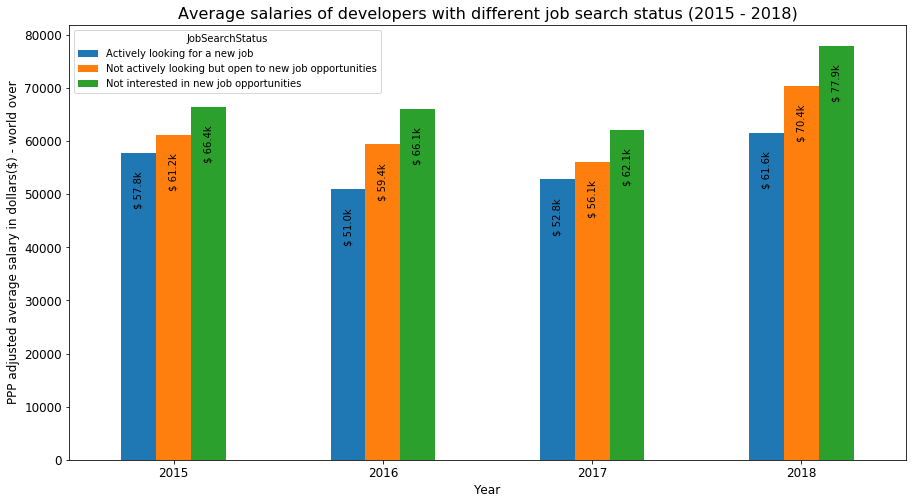

In [25]:
ax = df_job_search_status.iloc[0:4,:].plot(kind='bar',legend = True, figsize=(15, 8),fontsize=12)
ax.set_ylabel("PPP adjusted average salary in dollars($) - world over", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
plt.xticks(rotation = 0)
plt.title("Average salaries of developers with different job search status (2015 - 2018)", fontsize=16)

for patch in ax.patches:
     ax.text(patch.get_x()+0.06,  patch.get_height()-5000, "$ "+ str(round(patch.get_height()/1000, 1)) + "k", \
                                                                                         rotation=90,fontsize=10)

In [26]:
# Do data scientist make more than other developers.
df_is_data_scientist = df_year_2015_2018.copy()
df_is_data_scientist["Developer_type"] = df_is_data_scientist["Developer_type"].str.lower()

df_is_data_scientist["Is_data_scientist"] = \
            df_is_data_scientist["Developer_type"].str.contains("data scientist|machine learning|statistics")

In [27]:
# Not imputing the "Is_data_scientist" column for missing values as imputing it with mode might have unexpected influence over the results. 
# Moreover, we already have sufficient data to answer this question quite convincingly.

df_over_the_years = df_is_data_scientist.groupby(["Year","Is_data_scientist"]).mean()["Salary_ppp_adjusted"].unstack(level = 1)
print(round(df_over_the_years,0))

Is_data_scientist    False    True 
Year                               
2015               60858.0  66252.0
2016               58269.0  65281.0
2017               56633.0  58219.0
2018               68558.0  73602.0


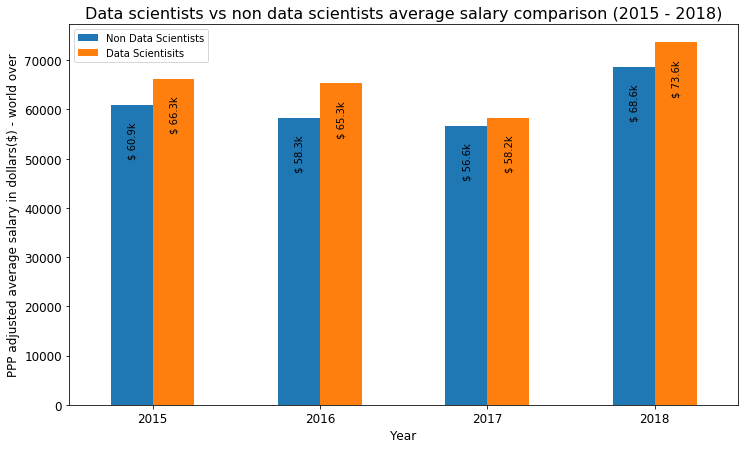

In [28]:
ax = round(df_over_the_years,0).plot(kind = "bar",legend = True, figsize=(12, 7),fontsize=12)
ax.set_ylabel("PPP adjusted average salary in dollars($) - world over", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
L = plt.legend()
L.get_texts()[0].set_text('Non Data Scientists')
L.get_texts()[1].set_text('Data Scientisits')
plt.xticks(rotation = 0)
plt.title("Data scientists vs non data scientists average salary comparison (2015 - 2018)", fontsize = 16)

for patch in ax.patches:
     ax.text(patch.get_x()+0.1,  patch.get_height()-5000, "$ "+ str(round(patch.get_height()/1000, 1)) + "k", \
                                                                                         rotation=90,fontsize=10)

In [29]:
df_country_avg_salary = \
                df_is_data_scientist.groupby(["Country","Is_data_scientist"]).mean()["Salary_ppp_adjusted"].unstack(level = 1)

idx3 = [i in ["United States","China","Japan","Germany","United Kingdom","France","India","Italy","Brazil","Canada"] \
                                                                                        for i in df_country_avg_salary.index]

df_top_10 = df_country_avg_salary.loc[idx3,:]
df_top_10["percentage_difference"] = ((df_top_10[True] - df_top_10[False])/df_top_10[False])*100
df_top_10 = df_top_10.sort_values("percentage_difference", axis = 0)

In [30]:
df_top_10 = df_top_10.rename(index=str, columns={False: "Not a Data Scientist",True:"Data Scientist"})
print(round(df_top_10,0))

Is_data_scientist  Not a Data Scientist  Data Scientist  percentage_difference
Country                                                                       
United Kingdom                  68675.0         65468.0                   -5.0
Japan                           53460.0         52928.0                   -1.0
Canada                          65152.0         65228.0                    0.0
Italy                           43454.0         43631.0                    0.0
France                          49014.0         49464.0                    1.0
China                           56315.0         57287.0                    2.0
Germany                         60646.0         61736.0                    2.0
India                           44673.0         45593.0                    2.0
United States                   94143.0         99359.0                    6.0
Brazil                          38194.0         44649.0                   17.0


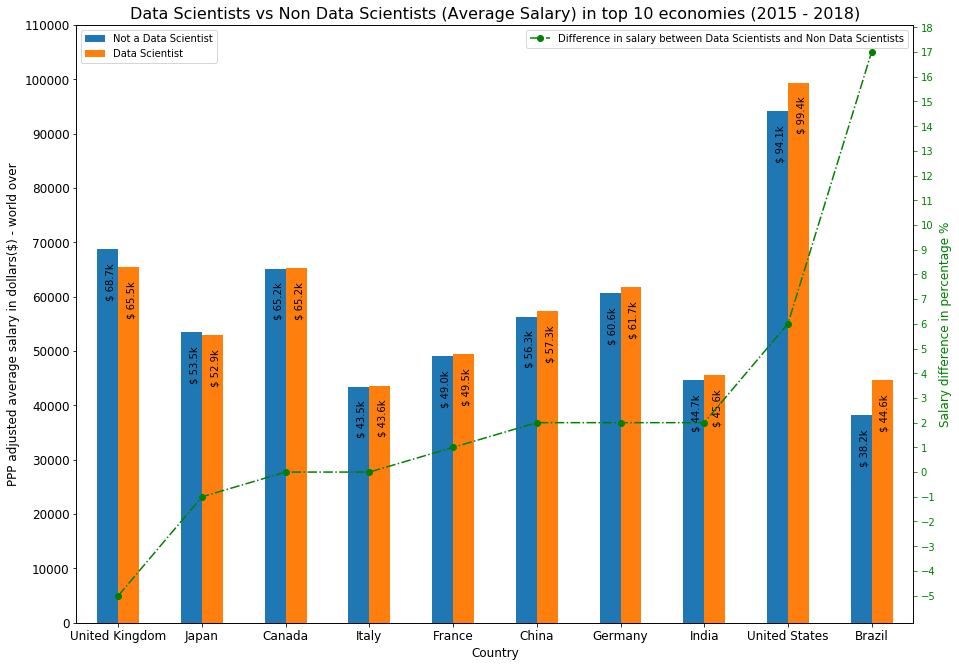

In [31]:
z = list(round(df_top_10["percentage_difference"],0))
ax1 = round(df_top_10.iloc[:,0:2],0).plot(kind='bar',figsize=(15, 11),fontsize=12, \
                                          label = ["Non Data Scientists","Data Scientists"])

ax2 = ax1.twinx()
curve2, = ax2.plot(df_top_10.index, z,"g", linestyle = "-.",marker = "o",\
                   label = "Difference in salary between Data Scientists and Non Data Scientists")

ax1.set_yticks(np.linspace(0,110000,12));
ax2.set_yticks(np.linspace(-5,18,24));
ax2.legend(loc=1)
ax1.legend(loc=2)
ax1.set_ylabel("PPP adjusted average salary in dollars($) - world over", fontsize = 12)
ax2.set_ylabel("Salary difference in percentage %", color = curve2.get_color(),fontsize = 12)
ax1.set_xlabel("Country", fontsize = 12)
ax1.xaxis.set_tick_params(rotation=0)
ax2.tick_params(axis = "y", colors = curve2.get_color())
plt.title("Data Scientists vs Non Data Scientists (Average Salary) in top 10 economies (2015 - 2018)", fontsize = 16)
for patch in ax1.patches:
     ax1.text(patch.get_x()+0.1,  patch.get_height()-4000, "$ "+ str(round(patch.get_height()/1000, 1)) + "k", \
                                                                                                rotation=90,fontsize=10)